# Python w analizie ekonomicznej - poziom zaawansowany, warsztaty
## Temat: Pandas - wstęp.

(odpowiedzi do zadań w czasie prezentacji proszę udzielać na czacie)

Jakub Tomczak *jakub.tomczak@cdv.pl*

Agenda:

    * wstęp do biblioteki Pandas

Wymagane biblioteki:

    * pandas
    * matplotlib

[Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) - open source'owa (kod jest dostępny online) biblioteka dostarczająca wysokiej wydajności oraz łatwe w użyciu struktury danych oraz narzędzia do analizy danych w języku python.

### Instalacja modułu `pandas` oraz `matplotlib`

Otwieramy konsolę `Anaconda prompt`.
<img src='imgs/anaconda_prompt.png' width="500" />

oraz instalujemy obie biblioteki za pomocą komendy
```bash
    pip install pandas matplotlib
```

w przypadku Anacondy powinny być one już zainstalowany.

Przechodzimy do folderu z plikiem `lab6_pandas.ipynb` w konsoli (za pomocą komendy `cd /d folder_z_plikiem_lab6_pandas.ipynb`).
W konsoli wpisujemy `jupyter notebook` - powinna otworzyć się przeglądarka internetowa wraz z wyświetloną listą pliku z folderu w którym byliśmy podczas uruchamiania komendy.
Otwieramy plik `lab6_pandas.ipynb`.
<img src="imgs/anaconda_jupyter notebook.png" width=600 />

<img src="imgs/anaconda_jupyter notebook1.png" width=800 />

Moduł `Pandas` będziemy importowali zawsze poprzez komendę

In [1]:
import pandas as pd

wówczas wszystkie funkcje dostępne w module `pandas` będziemy wywoływali poprzez kod `pd.[nazwa funkcji]`.

Moduł `matplotlib` będzie nam potrzebny do rysowania wykresów, importujemy go za pomocą polecenia

In [2]:
import matplotlib

## Wczytywanie danych

Pandas obsługuje wiele znanych formatów plików takich jak `csv`, `hdf5`, `json`, `html`, binarne, `sql`, `python pickle`, `SAS` ...

Na dzisiejszych zajęciach zajmiemy się plikami `csv` . W archiwum z plikami do tych zajęć znajduje się folder `files`, a w nim plik `cars.csv`.

To ten sam plik, który jest w przykładowych zbiorach do projektu.
```python
dataset = pd.read_csv('files/cars.csv', sep=';')
```

In [3]:
dataset = pd.read_csv('files/cars.csv', sep=';')

Wyświetlmy wczytany zbiór danych. Zauważmy, że oprócz kolumny `id`, przed nią, znajdują się indeksy wierszy - to indeksowanie jest automatycznie dodane przez pandas.

In [4]:
dataset

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36
5,6,skoda,octavia,osobowy,2014,22 000,0,21-04-2020 11:54
6,7,audi,a4,osobowy,2008,38 000,0,22-04-2020 01:12
7,8,volkswagen,golf,osobowy,2005,12 900,1,11-05-2020 15:48
8,9,mercedes-benz,klasa s 500,osobowy,2001,41 900,0,30-04-2020 14:52
9,10,renault,master,dostawczy,2016,37 314,0,13-04-2020 11:11


pandas wczytując dane tworzy obiekt `DataFrame`, który przechowuje kolumny z danymi jako typ `Series`.

In [5]:
print('Typ wczytanych danych', type(dataset))
print('Typ kolumny id', type(dataset['id']))

Typ wczytanych danych <class 'pandas.core.frame.DataFrame'>
Typ kolumny id <class 'pandas.core.series.Series'>


Aby nie wczytywać całego zbioru (niektóre zbiory mają po kilka milionów wierszy!), tylko pierwsze kilka wierszy, aby sprawdzić, czy dane są poprawnie załadowane, możemy użyć funkcji `head` na ramce danych

In [6]:
dataset.head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36


Wszystkie dane zostały poprawnie wczytane. 
Pandas potrafi samemu na podstawie danych w kolumnach ustawić odpowiedni typ danych w danej kolumnie - zgaduje, należy więc sprawdzić jakie typy przypisał wczytanym kolumnom.
Sprawdźmy jakie są typy kolumn za pomocą funkcji `info`, którą wywołujemy na zbiorze danych.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   id                                 14 non-null     int64 
 1   marka                              14 non-null     object
 2   model                              11 non-null     object
 3   typ samochodu                      14 non-null     object
 4   rocznik                            14 non-null     int64 
 5   cena                               14 non-null     object
 6   powypadkowy                        14 non-null     int64 
 7   data i godzina dodania ogłoszenia  14 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.0+ KB


Widzimy, że pandas potrafi również podliczyć liczbę pustych wartości już na etapie wczytywania danych - kolumna `Non-Null Count` dla wiersza `model`, gdzie mamy liczbę 11 co oznacza, że są 3 puste wartości (mają typ Null).

## Podstawowe informacje o ramce danych

Wyświetlanie podsumowana danych liczbowych

In [8]:
dataset.describe()

,id,rocznik,powypadkowy
count,14.0000,14.000000,14.000000
mean,7.5000,2010.500000,0.285714
std,4.1833,5.774613,0.468807
min,1.0000,2001.000000,0.000000
25%,4.2500,2005.500000,0.000000
50%,7.5000,2012.000000,0.000000
75%,10.7500,2015.500000,0.750000
max,14.0000,2018.000000,1.000000


Rozmiar ramki (liczba wierszy x liczba kolumn)

In [9]:
dataset.shape

(14, 8)

Liczba wierszy - metoda `len` znana z pythona.

In [10]:
len(dataset)

14

Nazwy kolumn

In [11]:
dataset.columns

Index(['id', 'marka', 'model', 'typ samochodu', 'rocznik', 'cena',
       'powypadkowy', 'data i godzina dodania ogłoszenia'],
      dtype='object')

Przechodzenie po ramce danych

In [12]:
for row in dataset:
    print(row)

id
marka
model
typ samochodu
rocznik
cena
powypadkowy
data i godzina dodania ogłoszenia


chyba nie o to nam chodziło...

In [13]:
for index, row in dataset.iterrows():
    print('indeks', index, '\n', type(row), '\n', row)

indeks 0 
 <class 'pandas.core.series.Series'> 
 id                                                  1
marka                                            ford
model                                           focus
typ samochodu                                 osobowy
rocznik                                          2010
cena                                            20500
powypadkowy                                         0
data i godzina dodania ogłoszenia    20-05-2020 14:20
Name: 0, dtype: object
indeks 1 
 <class 'pandas.core.series.Series'> 
 id                                                  2
marka                                            opel
model                                             NaN
typ samochodu                                 osobowy
rocznik                                          2014
cena                                           13 000
powypadkowy                                         0
data i godzina dodania ogłoszenia    19-05-2020 10:21
Name: 1, dtype:

Poznamy też inne metody przechodzenia po wierszach.

Zadanie 1 (1pkt.)

Wczytaj zbiór danych `wine` który jest dostępny pod adresem [https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv), natomiast opis tego zbioru znajduje się [stronie UCI - popularnej stronie z przykładowymi zbiorami danych](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Pandas obsługuje pobieranie danych z internetu - nie trzeba pobierać zbioru ręcznie tylko w metodzie `read_csv` zamiast ścieżki do pliku wstawić link do zbioru. Ustaw odpowieni separator kolumn. Wyświetl wczytane dane.


Zadanie 2 (1pkt.)

Wypisz informacje dotyczące zbioru `wine` (metoda `info`), sprawdź, czy zostały ustawione poprawne typy danych. Następnie wypisz podstawowe dane dotyczące zbioru za pomocą metody `describe`.

## Wyświetlanie danych z ramki danych `DataFrame`

Chcąc wyświetlić tylko część danych z ramki możemy skorzystać z kilku metod. Niestety nie możemy użyć indeksowania jak w zwykłej liście.

In [22]:
try:
    dataset[0]
except KeyError as e:
    print('Nie powiodło się wyświetlanie wiersza 0')

Nie powiodło się wyświetlanie wiersza 0


Aby wyświetlić pierwszy wiersz możemy użyć metody `iloc`, która pozwala na wybieranie wierszy oraz kolumn z ramki danych na postawie ich lokalizacji.

In [23]:
# wybranie całego pierwszego wiersza, : oznacza wybranie wszystkich kolumn - podobnie jak w numpy
dataset.iloc[0, :]

id                                                  1
marka                                            ford
model                                           focus
typ samochodu                                 osobowy
rocznik                                          2010
cena                                            20500
powypadkowy                                         0
data i godzina dodania ogłoszenia    20-05-2020 14:20
Name: 0, dtype: object

In [26]:
print('wybranie całego pierwszego wiersza, a z niego tylko kolumn `marka` oraz `cena`')
print(dataset.iloc[0, [1, 5]])
print()
print('niestety nie możemy używać nazw kolumn korzystając z iloc')
try:
    dataset.iloc[0, ['marka', 'cena']]
except IndexError as e:
    print('Nie udało się pobrać kolumn marka oraz cena, powód:', e)

wybranie całego pierwszego wiersza, a z niego tylko kolumn `marka` oraz `cena`
marka     ford
cena     20500
Name: 0, dtype: object

niestety nie możemy używać nazw kolumn korzystając z iloc
Nie udało się pobrać kolumn marka oraz cena, powód: .iloc requires numeric indexers, got ['marka' 'cena']


Możemy natomiast wybrać zakres wierszy oraz zakres kolumn korzystając z podobnej metody jak w przypadku macierzy w `numpy`, czy list pythonowych.

In [27]:
# wyświetl co drugi wiersz od 3 do 8 (wyłącznie) a z nich weź tylko kolumny od 2-giej do 4 (wyłącznie)
dataset.iloc[2:8:2, 1:3]

,marka,model
2,opel,adam
4,opel,astra
6,audi,a4


Dzięki metodzie `iloc` możemy łatwiej przechodzić po wierszach naszej ramki danych.

In [28]:
liczba_wierszy = dataset.shape[0]
# lub
liczba_wierszy = len(dataset)

for index in range(liczba_wierszy):
    print(dataset.iloc[index].marka)

ford
opel
opel
opel
opel
skoda
audi
volkswagen
mercedes-benz
renault
volkswagen
citroen
man
daf


Inną metodą do wyświetlania tylko wycinka danych jest metoda `loc`, bazuje ona jednak na indeksach dodanych przez pandas. Atutem tej metody jest możliwość wybierania kolumn po ich nazwach.

In [29]:
dataset.loc[:, ['marka', 'model']]

,marka,model
0,ford,focus
1,opel,NaN
2,opel,adam
3,opel,corsa
4,opel,astra
5,skoda,octavia
6,audi,a4
7,volkswagen,golf
8,mercedes-benz,klasa s 500
9,renault,master


In [30]:
dataset.loc[2:8:2, ['marka', 'model']]

,marka,model
2,opel,adam
4,opel,astra
6,audi,a4
8,mercedes-benz,klasa s 500


## Różnica między `.loc`, a `.iloc`

W przypadku, gdy indeksy są po kolei nie ma różnicy między metodą `iloc` a `loc`, natomiast różnice pojawiają się, gdy usuniemy część danych i części z indeksów dodanych przez pandas nie będzie.
Przykład

In [31]:
# tworzymy zbiór, który jest naszym zbiorem pojazdów ale bez wiersza z indeksem 2
dataset_removed = dataset.drop(2)
dataset_removed.head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36
5,6,skoda,octavia,osobowy,2014,22 000,0,21-04-2020 11:54


Próba pobrania wartości z indeksem 2 za pomocą metody `.loc`

In [34]:
try:
    dataset_removed.loc[2]
except KeyError as e:
    print('Nie udało się wyświetlić wiersza z indeksem 2')

Nie udało się wyświetlić wiersza z indeksem 2


Próba pobrania wiersza na pozycji 3-ciej

In [35]:
dataset_removed.iloc[2]

id                                                  4
marka                                            opel
model                                           corsa
typ samochodu                                 osobowy
rocznik                                          2014
cena                                           13 000
powypadkowy                                         1
data i godzina dodania ogłoszenia    19-05-2020 08:21
Name: 3, dtype: object

Należy pamiętać o tej różnicy. Problem ten można obejść jeżeli resetujemy indeks danej ramki danych po każdym usunięciu danych za pomocą metody [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html#pandas.DataFrame.reset_index)

In [36]:
dataset_removed.reset_index(drop=True, inplace=True)
dataset_removed.head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21
2,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
3,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36
4,6,skoda,octavia,osobowy,2014,22 000,0,21-04-2020 11:54


In [37]:
# po resecie indeksów już możemy pobierać wiersz z indeksem 2
dataset_removed.loc[2]

id                                                  4
marka                                            opel
model                                           corsa
typ samochodu                                 osobowy
rocznik                                          2014
cena                                           13 000
powypadkowy                                         1
data i godzina dodania ogłoszenia    19-05-2020 08:21
Name: 2, dtype: object

Jeżeli chcemy wyciągać tylko kolumny z ramki danych możemy to zrobić z wykorzystaniem indeksowania ramki danych

In [38]:
dataset[['cena', 'marka']]

,cena,marka
0,20500,ford
1,13 000,opel
2,35 000,opel
3,13 000,opel
4,8 900,opel
5,22 000,skoda
6,38 000,audi
7,12 900,volkswagen
8,41 900,mercedes-benz
9,37 314,renault


Albo podając nazwę kolumny bezpośrednio (uwaga, metoda tylko dla kolumn które mają poprawną nazwę jeżeli chodzi o nazewnictwo zmiennych w python). Metoda ta służy do wyciągania tylko 1 kolumny na raz.

In [39]:
dataset.cena

0       20500
1      13 000
2      35 000
3      13 000
4       8 900
5      22 000
6      38 000
7      12 900
8      41 900
9      37 314
10      6 900
11     48 780
12     22 000
13    142 000
Name: cena, dtype: object

## Wybieranie danych z ramki danych podsumowanie ([pełen opis w dokumentacji](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html))

Metoda `.loc` - bazuje na indeksach (można używać nazwy kolumn)
```python
dataset.loc[2:10, ['cena', 'marka']] # wiersze od 3 do 11 wyłącznie, kolumny cena oraz marka
dataset.loc[:, ['cena', 'marka']] # wszystki wiersze, kolumny cena oraz marka
dataset.loc[dataset.rocznik > 2010, ['cena', 'marka', 'rocznik']] # wszystkie pojazdy, gdzie rocznik > 2010, tylko kolumny cena, marka oraz rocznik 
```

Metoda `.iloc` - bazuje na pozycjach (nie można używać nazw kolumn, należy używać ich indeksów)
```python
dataset.iloc[2:10, [5, 1]] # wiersze od 3 do 11 wyłącznie, kolumny cena oraz marka
dataset.iloc[:, [5, 1]] # wszystki wiersze, kolumny cena oraz marka
dataset.iloc[:, 5].dtype # pobranie typu danych w kolumnie cena
```

Metoda `slice'owania` - możliwość wyciągnięcia danej kolumny, lub wyciągnięcia wierszy spełniających warunek
```python
dataset['cena'] # kolumna cena
dataset[['cena', 'marka']] # kolumny cena oraz marka
dataset[dataset.rocznik > 2014] # wszystkie pojazdy, gdzie rocznik > 2014, nie ma możliwości podania wycinka kolumn
```

Metoda `'bezpośrednia'` - możliwość wyciągnięcia 1 kolumny, której nazwa jest poprawna w pythonie ([tutaj](https://docs.python.org/3/reference/lexical_analysis.html#identifiers) znajduje się wyjaśnienie co to znaczy, że nazwa jest poprawna), nazwa kolumny nie może mieć nazwy takiej jak na przykład `min`, czy `max`, które są nazwami metod w pandas. Metodę można łączyć z innymi metodami
```python
dataset.cena # kolumna cena
dataset.loc[dataset.rocznik > 2010].cena # wszystkie pojazdy, gdzie rocznik > 2010, tylko kolumna cena
dataset[dataset.rocznik > 2010].cena # wszystkie pojazdy, gdzie rocznik > 2010, tylko kolumna cena
dataset.cena.dtype # pobranie typu danych w kolumnie cena
```
Metoda `.ix` - już nie używana (ale metoda ta jest czasami używana w tutorialach), powinna być zastępowana poprzez `.loc` oraz `.iloc`.

Zadanie 3 (1pkt.)

Wybierz 5 ostatnich pojazdów - wyświetl ich model, markę oraz cenę.

## Wybieranie danych, które spełniają podane warunki

W pandas możemy wybierać tylko te wiersze, które spełniają podane warunki. Jak widzieliśmy na poprzednim slajdzie możemy wybierać tylko te pojazdy, których rocznik jest większy od 2010, czy 2014. Przy definiowaniu warunków możemy używać operatorów `>`, `>=`, `<=`, `<`, `==`.

In [41]:
dataset.loc[dataset['powypadkowy'] == 1]

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36
7,8,volkswagen,golf,osobowy,2005,12 900,1,11-05-2020 15:48
12,13,man,NaN,ciężarowy,2004,22 000,1,13-05-2020 10:15


Jeżeli chcemy wybrać wartości, które są w jakimś przedziale - np. tylko marki `opel` oraz `ford` możemy użyć metody `.isin(lista)`

In [42]:
dataset[dataset.marka.isin(['opel', 'ford'])]

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36


Jeżeli natomiast potrzebujemy wybrać dane w pewnym zakresie, np. tylko te pojazdy, których rocznik > 2000 oraz rocznik < 2005 to musimy wykorzystać operator `&` dla `and`. Warunki musimy umieszczać w nawiasach `()`.

In [43]:
dataset[(dataset.rocznik > 2000) & (dataset.rocznik < 2005)]

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
8,9,mercedes-benz,klasa s 500,osobowy,2001,41 900,0,30-04-2020 14:52
10,11,volkswagen,craft,dostawczy,2003,6 900,0,20-05-2020 10:19
12,13,man,NaN,ciężarowy,2004,22 000,1,13-05-2020 10:15


Można również używać operatora `|` dla operatora `or` lub `~` dla operatora `not`.

In [44]:
dataset[(dataset.rocznik <= 2000) | (dataset.rocznik >= 2005)].head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36


In [45]:
# wypisz wszystkie auta, gdzie rocznik <=2000 lub rocznik >= 2005
warunek = (dataset.rocznik > 2000) & (dataset.rocznik < 2005)
dataset[~warunek].head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36


Zadanie 4 (1pkt.)

Wyświetl wszystkie pojazdy typu `ciężarowy` oraz `dostawczy`.

Zadanie 5 (1pkt.)

Wyświetl model oraz markę wszystkich pojazdów wyprodukowanych po 2005 roku.

Zadanie 6 (1pkt.)

Wyświetl wszystkie wiersze, w których, w kolumnie `model`, występują brakujące dane (oznaczone jako `NaN`), możesz wykorzystać funkcję `isna`, która opisana jest w [dokumentacji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna)

Zadanie 7 (1pkt.)

Wyświetl ponownie model oraz markę wszystkich pojazdów wyprodukowanych po 2005 roku tym razem nie wyświetlaj pojazdów, które mają brak wartości w kolumnie model (czyli mają wartość NaN w kolumnie model).

Użycie metody `query` - 'pod spodem' używa metody `.loc` oraz `eval`.

In [50]:
dataset.query('rocznik > 2000 & rocznik < 2005')

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
8,9,mercedes-benz,klasa s 500,osobowy,2001,41 900,0,30-04-2020 14:52
10,11,volkswagen,craft,dostawczy,2003,6 900,0,20-05-2020 10:19
12,13,man,NaN,ciężarowy,2004,22 000,1,13-05-2020 10:15


## Dodawanie nowej kolumny do danych
Czasami musimy transformować pewne dane a wynik tej transformacji zapisać do nowej kolumny.
Połączymy nazwę marki oraz modelu w jeden ciąg znaków.

In [51]:
dataset['marka_model'] = dataset['marka'] + ' ' +dataset['model']
dataset

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia,marka_model
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20,ford focus
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21,NaN
2,3,opel,adam,osobowy,2018,35 000,0,11-05-2020 13:21,opel adam
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21,opel corsa
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36,opel astra
5,6,skoda,octavia,osobowy,2014,22 000,0,21-04-2020 11:54,skoda octavia
6,7,audi,a4,osobowy,2008,38 000,0,22-04-2020 01:12,audi a4
7,8,volkswagen,golf,osobowy,2005,12 900,1,11-05-2020 15:48,volkswagen golf
8,9,mercedes-benz,klasa s 500,osobowy,2001,41 900,0,30-04-2020 14:52,mercedes-benz klasa s 500
9,10,renault,master,dostawczy,2016,37 314,0,13-04-2020 11:11,renault master


## Usuwanie kolumn

In [52]:
# axis=1 wskazuje, że chcemy usuwać kolumny
# axis=0 (domyślna wartość) wskazuje, że chcemy usuwać wiersze
dataset = dataset.drop('marka_model', axis=1)
dataset

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36
5,6,skoda,octavia,osobowy,2014,22 000,0,21-04-2020 11:54
6,7,audi,a4,osobowy,2008,38 000,0,22-04-2020 01:12
7,8,volkswagen,golf,osobowy,2005,12 900,1,11-05-2020 15:48
8,9,mercedes-benz,klasa s 500,osobowy,2001,41 900,0,30-04-2020 14:52
9,10,renault,master,dostawczy,2016,37 314,0,13-04-2020 11:11


Zadanie 8 (1pkt.)

Usuń kolumnę `id` z danych. Wyświetl dane aby sprawdzić, czy kolumna została poprawnie usunięta.

## Ustawianie poprawnych typów danych w kolumnach

Wyświetlamy, przy użyciu metody `info` po raz kolejny typy danych w ramce - tym razem sprawdzamy jakie typy danych zostały przypisane kolumnom.

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   marka                              14 non-null     object
 1   model                              11 non-null     object
 2   typ samochodu                      14 non-null     object
 3   rocznik                            14 non-null     int64 
 4   cena                               14 non-null     object
 5   powypadkowy                        14 non-null     int64 
 6   data i godzina dodania ogłoszenia  14 non-null     object
dtypes: int64(2), object(5)
memory usage: 912.0+ bytes


Po wczytaniu danych pandas może nie rozpoznać poprawnie typów danych. Może to wynikać z różnych powodów - np. dane w kolumnie, która powinna być interpretowana jako liczba zmiennoprzecinkowa zamiast kropki ma przecinek lub ma spację w środku i stąd jest interpretowana niepoprawnie. 

`marka`, `model` oraz `typ samochodu` są ciągami znaków, więc będą miały typ `object`.
Rocznik został również rzutowany na poprawny typ danych - liczba całkowita.

<b>Natomiast cena nie jest poprawnie ustawiona - jest typu `object`.</b>
Stało się tak dlatego, że w cenie występują spacje. Aby ustawić poprawny typ danych musimy więc usunąć spacje i spróbować rzutować dane na typ liczbowy ponownie.

Aby usunąć spacje z ciągu znaków i rzutować ten ciąg znaków na liczbę wykorzystamy następujący sposób

In [88]:
x = '40 000'

def string_with_space_to_int(x):
    '''
    Funkcja biorąca jako argument ciąg znaków, w którym każda spacja jest zamieniana na pusty znak.
    Następnie tak zmieniony ciąg jest zamieniany na liczbę.
    '''
    return int(x.replace(' ', ''))

x_int = string_with_space_to_int(x)
print('Wynik funkcji', x_int)
print('Wynik funkcji - typ: ', type(x_int))

Wynik funkcji 40000
Wynik funkcji - typ:  <class 'int'>


Pobieramy dane z kolumny `cena` do zmiennej `price_column`:

In [56]:
price_column = dataset['cena']
price_column

0       20500
1      13 000
2      35 000
3      13 000
4       8 900
5      22 000
6      38 000
7      12 900
8      41 900
9      37 314
10      6 900
11     48 780
12     22 000
13    142 000
Name: cena, dtype: object

W zmiennej `price_column` przechowujemy dane z kolumny `cena`. Zmienna `price_column` jest typu `Series`

In [57]:
type(price_column)

pandas.core.series.Series

Możemy na niej wywołać metodę `map` - aplikuje ona podaną funkcję (może być to funkcja anonimowa lambda) do każdego elementu w serii

In [58]:
price_column_int = price_column.map(string_with_space_to_int)
price_column_int

0      20500
1      13000
2      35000
3      13000
4       8900
5      22000
6      38000
7      12900
8      41900
9      37314
10      6900
11     48780
12     22000
13    142000
Name: cena, dtype: int64

In [59]:
# równoważny przykład z użyciem funkcji anonimowej lambda wewnątrz funkcji map
price_column_int_2 = price_column.map(lambda x: int(x.replace(' ', ''))) # zmienna x będzie pojedynczą ceną
price_column_int_2

0      20500
1      13000
2      35000
3      13000
4       8900
5      22000
6      38000
7      12900
8      41900
9      37314
10      6900
11     48780
12     22000
13    142000
Name: cena, dtype: int64

Jak widzimy w zmiennej `price_column_int` są już dane liczbowe, zamieniamy wartości w kolumnie z ceną w naszej oryginalnej ramce danych na ceny, które są w formacie liczbowym:

In [60]:
dataset['cena'] = price_column_int
dataset

,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
1,opel,NaN,osobowy,2014,13000,0,19-05-2020 10:21
2,opel,adam,osobowy,2018,35000,0,11-05-2020 13:21
3,opel,corsa,osobowy,2014,13000,1,19-05-2020 08:21
4,opel,astra,osobowy,2007,8900,1,14-05-2020 09:36
5,skoda,octavia,osobowy,2014,22000,0,21-04-2020 11:54
6,audi,a4,osobowy,2008,38000,0,22-04-2020 01:12
7,volkswagen,golf,osobowy,2005,12900,1,11-05-2020 15:48
8,mercedes-benz,klasa s 500,osobowy,2001,41900,0,30-04-2020 14:52
9,renault,master,dostawczy,2016,37314,0,13-04-2020 11:11


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   marka                              14 non-null     object
 1   model                              11 non-null     object
 2   typ samochodu                      14 non-null     object
 3   rocznik                            14 non-null     int64 
 4   cena                               14 non-null     int64 
 5   powypadkowy                        14 non-null     int64 
 6   data i godzina dodania ogłoszenia  14 non-null     object
dtypes: int64(3), object(4)
memory usage: 912.0+ bytes


Teraz zajmujemy się datami. One też są w niepoprawnym formacie. Chcielibyśmy, aby miał format daty - wówczas łatwo będzie sprawdzić, która data jest pierwsza lub pobrać rekordy w podanym przedziale dat. W tym celu ponownie wyciągamy całą kolumnę do zmiennej:

In [62]:
date_column = dataset['data i godzina dodania ogłoszenia']
date_column

0     20-05-2020 14:20
1     19-05-2020 10:21
2     11-05-2020 13:21
3     19-05-2020 08:21
4     14-05-2020 09:36
5     21-04-2020 11:54
6     22-04-2020 01:12
7     11-05-2020 15:48
8     30-04-2020 14:52
9     13-04-2020 11:11
10    20-05-2020 10:19
11    10-05-2020 08:40
12    13-05-2020 10:15
13    26-05-2020 11:45
Name: data i godzina dodania ogłoszenia, dtype: object

W tym przypadku nie musimy korzystać z metody `map` - pandas ma już przygotowaną metodę [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html). Metoda ta zwraca kolumnę/kolumny z danymi sformatowanymi jako daty (jeżeli konwersja się powiedzie) . Jako jej argumenty należy podać ramkę danych/serię danych oraz format danych, które są datami (pandas musi wiedzieć jaki jest format ciągu znaków zapisany w danych, tak żeby poprawnie zidentyfikować dzień, miesiąc, rok, godzinę, czy miuntę). Jak poprawnie ustawić format danych możemy przeczytać [tutaj](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

W naszym przypadku dane są w formacie `dzień-miesiąc-rok godzina:minuta`, co odpowiada formatowi `dd-mm-YYYY hh:MM`.

In [63]:
date_column_as_datetime = pd.to_datetime(date_column, format='%d-%m-%Y %H:%M')
date_column_as_datetime

0    2020-05-20 14:20:00
1    2020-05-19 10:21:00
2    2020-05-11 13:21:00
3    2020-05-19 08:21:00
4    2020-05-14 09:36:00
5    2020-04-21 11:54:00
6    2020-04-22 01:12:00
7    2020-05-11 15:48:00
8    2020-04-30 14:52:00
9    2020-04-13 11:11:00
10   2020-05-20 10:19:00
11   2020-05-10 08:40:00
12   2020-05-13 10:15:00
13   2020-05-26 11:45:00
Name: data i godzina dodania ogłoszenia, dtype: datetime64[ns]

następnie przypisujemy daty do oryginalnej ramki danych

In [64]:
dataset['data i godzina dodania ogłoszenia'] = date_column_as_datetime

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   marka                              14 non-null     object        
 1   model                              11 non-null     object        
 2   typ samochodu                      14 non-null     object        
 3   rocznik                            14 non-null     int64         
 4   cena                               14 non-null     int64         
 5   powypadkowy                        14 non-null     int64         
 6   data i godzina dodania ogłoszenia  14 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 912.0+ bytes


### Statystyki dla kolumn

Obliczanie statystyk dla kolumn z użyciem pandas jest wyjątkowo proste. Najczęściej jedyne co musimy wykonać to wywołać odpowiednią metodę na kolumnie z danymi.
Dla przykładu, <b>obliczenie minimalnej wartości</b> dla kolumny cena możemy wykonać za pomocą wyrażenia:


In [66]:
dataset.loc[:, ['cena']].min()

cena    6900
dtype: int64

Albo jeszcze prościej

In [67]:
print(dataset.cena.min())
print(dataset['cena'].min())

6900
6900


Podobnie wywołujemy metody obliczające wartość maksymalną

In [68]:
dataset.cena.max()

142000

Średnią

In [69]:
dataset.cena.mean()

33013.857142857145

Odchylenie standardowe

In [70]:
dataset.cena.std()

34105.16124680148

Natomiast dla każdej z kolumn możemy wywołać metodę `describe()`, która, w zależności typu danych danej kolumny, wypisze podsumowanie danej kolumny

In [71]:
dataset.cena.describe()

count        14.000000
mean      33013.857143
std       34105.161247
min        6900.000000
25%       13000.000000
50%       22000.000000
75%       37828.500000
max      142000.000000
Name: cena, dtype: float64

In [72]:
dataset.model.describe()

count       11
unique      11
top       adam
freq         1
Name: model, dtype: object

In [73]:
dataset['data i godzina dodania ogłoszenia'].describe()

count                      14
unique                     14
top       2020-05-20 10:19:00
freq                        1
first     2020-04-13 11:11:00
last      2020-05-26 11:45:00
Name: data i godzina dodania ogłoszenia, dtype: object

Zadanie 9 (1pkt.)

Oblicz średnią dla wszystkich pojazdów, które są samochodami osobowymi.

Zadanie 10 (1pkt.)

Wyświetl dane pojazdu, którego cena jest najwyższa w zbiorze.

Zadanie 11 (1pkt.)

Oblicz średnią cenę pojazdów w kwietniu.

Zadanie 12 (1 pkt.)

Zamień wszystki wartości `NaN` w kolumnie `model` na wartości `brak danych`.

## Tworzenie histogramów danych w kolumnach
Histogram - graficzne przedstawienie rozkładu danych.

W pandas możemy w bardzo prosty sposób wykonać histogram danej kolumny. Wystarczy użyć funkcji `hist` na danej kolumnie, właśnie dla tej funkcji potrzebny był wcześniejszy import biblioteki `matplotlib`. Dokładny opis metody `hist` oraz jej argumenty znajdują się w [dokumentacji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.hist.html?highlight=hist#pandas.Series.hist).

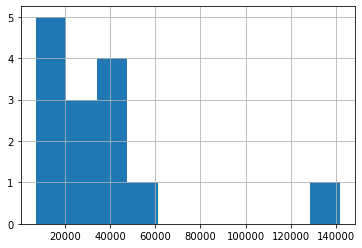

In [79]:
dataset.cena.hist()

Jeżeli chcemy szybko podejrzeć histogramy każdej z kolumn liczbowych, możemy skorzystać z metody `hist` wykonanej na całej ramce danych, a nie na pojedynczej kolumnie.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8D6FE65C8>,
      dtype=object)

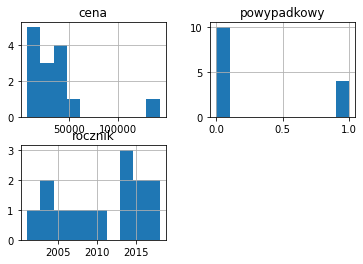

In [80]:
dataset.hist()

Rysowanie histogramu z opisami osi.

Text(0.5, 1.0, 'Histogram ceny pojazdów')

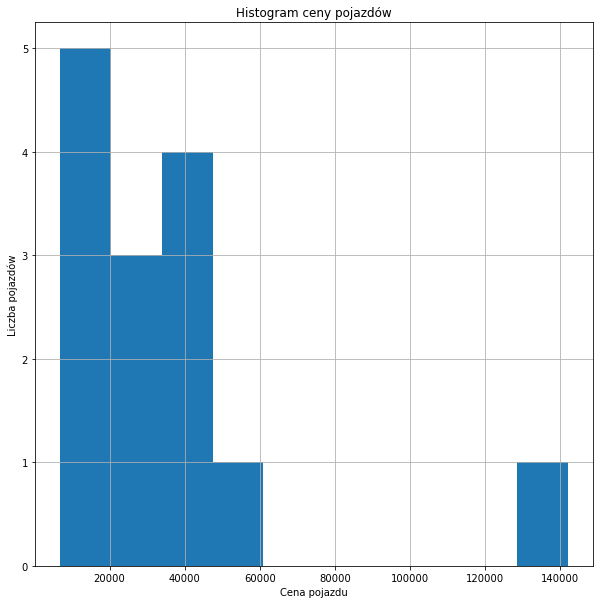

In [81]:
import matplotlib.pyplot as plt

# funkcja subplots z matplotliba zwraca 2 obiekty
# 1. fig - obiekt wykresu
# 2. ax - obiekt osi
# dzięki tym obiektom możemy zmieniać elementy wykresu przed jego wyświetleniem,
# na przykład, można dodać tytuł wykresu, zmienić liczby na osi, ich kolory, czy same tytuły osi
# argument figsize przyjmuje tuplę, która definiuje rozmiar wykresu w calach (tak, kiepskie)
fig, ax = plt.subplots(figsize=(10, 10))

# rysowanie histogramu, jak poprzednio
dataset.cena.hist()

# dodatkowo zmieniamy pewne ustawienia wykresu żeby wyglądał lepiej

# dodanie opisu osi x
plt.xlabel('Cena pojazdu')
# dodanie opisu osi y
plt.ylabel('Liczba pojazdów')
plt.title('Histogram ceny pojazdów')

Więcej opcji zmiany wyglądu wykresu znajduje się w dokumnetacji [matplotlib](https://matplotlib.org/contents.html), która jest dosyć obszerna. Dlatego warto zacząć na przykład od tego [tutoriala](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

## Zapisywanie histogramu
Aby zapisać histogram wygenerowany za pomocą pandas musimy wcześniej zaimportować moduł `matplotlib.pyplot`. Następnie tworzymy histogram, a na końcu wykorzystujemy funkcję `savefig` z modułu `matplotlib.pyplot` do zapisania wykresu.

Jako pierwszy parametr funkcji `savefig` podajemy nazwę pliku w jakim ma być zapisany histogram.

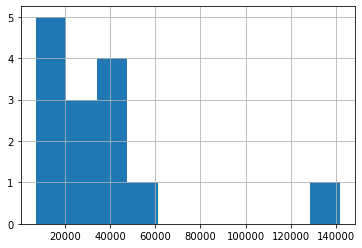

In [82]:
import matplotlib.pyplot as plt

dataset.cena.hist()

plt.savefig('cena_hist.png')

Zadanie 13 (1pkt.)

Wygeneruj histogram dla kolumny z rocznikiem pojazdu, dodaj tytuł wykresu oraz osi x, y. Zapisz histogram do pliku `rocznik_hist.png`.

## Zapisywanie zbioru danych

Po wykonaniu operacji na danych zapisujemy ramkę danych z powrotem na dysku. Możemy zapisać ją do formatu `csv` ale też np. excela.

Zazwyczaj każda z funkcji zapisujących dane zaczyna się od `to_`, np. [`to_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_csv.html#pandas.Series.to_csv), [`to_pickle`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_csv.html#pandas.Series.to_csv), czy [`to_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_excel.html).


### Zapisywanie do `csv`

Podczas zapisywania ramki danych do formatu `csv` musimy pamiętać o podaniu separatora kolumn - domyślnie jest to przecinek. Możemy podać go jako argument `sep` metody `to_csv`.

W wielu krajach (np. USA) część całkowita od ułamkowej jest oddzielona kropką, natomiast W Polsce stosuje się przecinek. Stąd korzystanie z przecinka jako separatora nie jest dobrym pomysłem. Najczęsciej jest stosowany średnik `;`.

In [84]:
dataset.to_csv('przetworzone_dane.csv', sep=';')

Zapisane dane w formacie `csv` mają domyślnie dodany indeks wygenerowany przez pandas,
aby tego uniknąć powinniśmy zapisywać pliki przy użyciu funkcji `to_csv` z użyciem argumentu `index=False`.

In [85]:
dataset.to_csv('przetworzone_dane.csv', sep=';', index=False)

### Zapisywanie do `excela`

Istnieje możliwość zapisania ramki danych do formatu excela (`xlsx`). Jednkaże w tym celu musimy zainstalować dodatkowy moduł `openpyxl`.

In [86]:
# UWAGA! możliwość zapisu do formatu excela wymaga instalacji biblioteki openpyxl
!pip install openpyxl

You should consider upgrading via the 'd:\davincizajęcia\python_w_analizie_ekonomicznej_poziom_zaawansowany\env\scripts\python.exe -m pip install --upgrade pip' command.


In [87]:
dataset.to_excel('przetworzone_dane.xlsx', sheet_name='Dane')

Dodatkowe źródła:

   * [Getting started tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html) - krótkie tutoriale na początek, aktualne i z dużą liczbą wyjaśnień
   * [Tutorial effective-pandas](https://github.com/TomAugspurger/effective-pandas) (trochę stary)
   * [Data analysis in Python with Pandas - filmy](https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y)
   * [Dokumentacja Pandas]()
   * [Kurs na datacamp.com](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)